## 1. WAP to implement the Perceptron Learning Algorithm using numpy in Python. Evaluate performance of a single perceptron for NAND and XOR truth tables as input dataset.

### Description
#### This Python script implements a Perceptron Learning Algorithm and evaluates its performance on NAND and XOR logic gates. Additionally, it visualizes the decision boundaries.

## Perceptron Implementation with Numpy

---
### Explanation:

1.  **Initialization**:
    
    -   `weights`: Initialized with zeros, including a bias weight.
    -   `learning_rate`: Determines the step size for weight updates.
    -   `epochs`: Number of iterations over the entire dataset.
2.  **Activation Function**:
    
    -   A step function that outputs 1 if the weighted sum is non-negative, otherwise 0.
3.  **Training (fit method)**:
    
    -   For each input, the perceptron predicts the output.
    -   The weights are updated based on the error (`y[i] - y_pred`) and the learning rate.
4.  **Prediction**:
    
    -   Computes the weighted sum of inputs and applies the activation function.
5.  **Example**:
    
    -   The program trains the perceptron on a basic AND logic gate dataset and predicts the outputs for the same inputs.


## Class Perceptron

### Defining the Perceptron Class,Activation function,predict & fit functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=10):
        self.weights = np.random.randn(input_size + 1)  # +1 for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
    
    def activation(self, x):
        return 1 if x >= 0 else 0
    
    def predict(self, x):
        x = np.insert(x, 0, 1)  # Adding bias term
        return self.activation(np.dot(self.weights, x))
    
    def train(self, X, y):
        for _ in range(self.epochs):
            for xi, target in zip(X, y):
                xi = np.insert(xi, 0, 1)  # Adding bias term
                prediction = self.activation(np.dot(self.weights, xi))
                error = target - prediction
                self.weights += self.learning_rate * error * xi
    
    def evaluate(self, X, y):
        correct = sum(self.predict(x) == target for x, target in zip(X, y))
        accuracy = correct / len(y)
        return accuracy
    
    def plot_decision_boundary(self, X, y, title):
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = np.array([self.predict(np.array([x, y])) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
        plt.title(title)
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.show()

### NAND Gate
#### -The NAND gate is linearly separable, so the perceptron should learn it successfully.
#### -Expected accuracy: 100%.
#### -The decision boundary is plotted.

Perceptron NAND Accuracy: 1.0


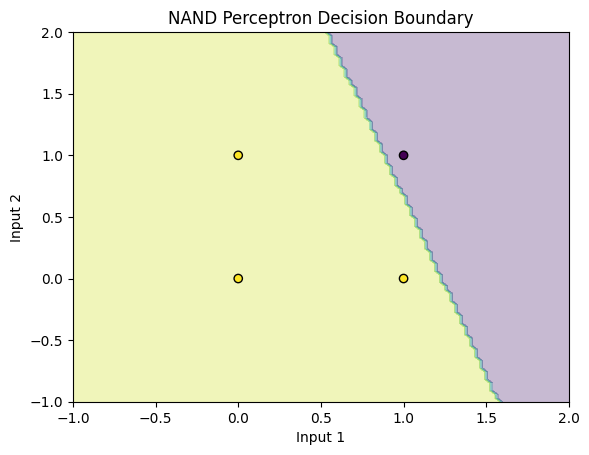

In [2]:
# NAND Truth Table
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_nand = np.array([1, 1, 1, 0])  # NAND output

# Train Perceptron for NAND
perceptron_nand = Perceptron(input_size=2, learning_rate=0.1, epochs=100)
perceptron_nand.train(X_nand, y_nand)
nand_accuracy = perceptron_nand.evaluate(X_nand, y_nand)
print("Perceptron NAND Accuracy:", nand_accuracy)
perceptron_nand.plot_decision_boundary(X_nand, y_nand, "NAND Perceptron Decision Boundary")

### XOR  Gate
#### -The XOR gate is not linearly separable, so a single-layer perceptron fails to learn it.
#### -Expected accuracy: ~50% (random guessing).
#### -The decision boundary will be incorrect.

Perceptron XOR Accuracy: 0.5


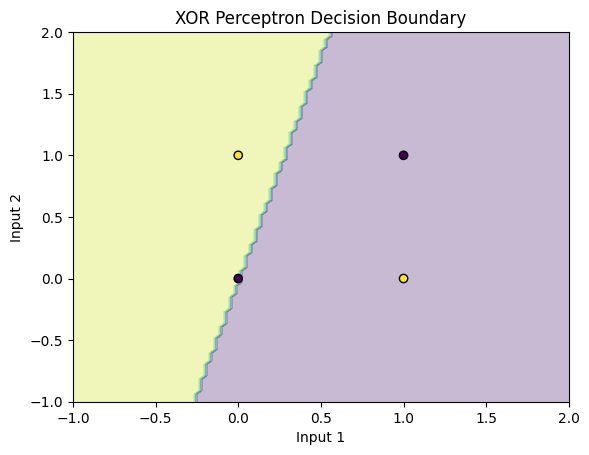

In [3]:
# XOR Truth Table
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])  # XOR output

# Train Perceptron for XOR
perceptron_xor = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
perceptron_xor.train(X_xor, y_xor)
xor_accuracy = perceptron_xor.evaluate(X_xor, y_xor)
print("Perceptron XOR Accuracy:", xor_accuracy)
perceptron_xor.plot_decision_boundary(X_xor, y_xor, "XOR Perceptron Decision Boundary")

### Example usage:

In [6]:
if __name__ == "__main__":
    # Define training data (AND logic gate example)
    X = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])

    y = np.array([0, 0, 0, 1])  # Output for AND gate

    # Create and train the perceptron
    perceptron = Perceptron(input_size=2, learning_rate=0.1, epochs=10)
    perceptron.fit(X, y)

    # Test the perceptron
    for x in X:
        print(f"Input: {x}, Predicted Output: {perceptron.predict(x)}")

Input: [0 0], Predicted Output: 0
Input: [0 1], Predicted Output: 0
Input: [1 0], Predicted Output: 0
Input: [1 1], Predicted Output: 1
